In [6]:
!pip install deepface

In [7]:
!pip install pandas

In [8]:
!pip install ultralytics

In [9]:
!pip install faiss-cpu

In [10]:
import faiss
from deepface import DeepFace
import pandas as pd
import cv2
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import random

In [11]:
model_name = 'ArcFace'
detector_backend = 'mtcnn'
num_dimension = 512

In [12]:
index = faiss.IndexFlatL2(num_dimension)

In [13]:
representation = []
data_nama = pd.DataFrame(columns=["name", "embedding", "posisi"])

data_foto = {
    "elon_musk.jpg" : "Elon Musk",
    "elon_musk2.jpg" : "Elon Musk",
    "jeff_bezos.jpg" : "Jeff Bezos",
    "jeff_bezos2.jpg" : "Jeff Bezos",
    "mark_z.jpg" : "Mark Zuckerberg",
    "Mark_z2.jpg" : "Mark Zuckerberg"
}
data_jabatan = {
    "Elon Musk": "CEO of SpaceX and Tesla",
    "Jeff Bezos": "Founder of Amazon",
    "Mark Zuckerberg": "CEO of Meta"
}
for r, d, files in os.walk("c:/Users/user/faiss-nyoba/"):
    for file in files:
        if ".jpg" in file:
            exact_file = f"{r}/{file}"
            objs = DeepFace.represent(
                img_path=exact_file,
                model_name=model_name,
                detector_backend=detector_backend
            )
            name = data_foto.get(file, 'Unknown')
            posisi = data_jabatan.get(name, 'Unknown Position')
            for obj in objs:
                embedding = obj["embedding"]
                representation.append([file, embedding])
                
                new_row = pd.DataFrame({"name": [name], "embedding": [embedding], "posisi": [posisi]})
                data_nama = pd.concat([data_nama, new_row], ignore_index=True)

1/1 [==============================] - 0s 41ms/step


In [14]:
for obj in objs:
    print(len(obj["embedding"]))

512


In [15]:
print(data_nama)

              name                                          embedding  \
0        Elon Musk  [-0.008028720505535603, -0.12027040123939514, ...   
1        Elon Musk  [-0.05572924017906189, -0.15940876305103302, -...   
2       Jeff Bezos  [-0.00029354169964790344, 0.17628401517868042,...   
3       Jeff Bezos  [0.08101458102464676, 0.20531275868415833, -0....   
4  Mark Zuckerberg  [0.0018233796581625938, 0.1025901734828949, 0....   
5  Mark Zuckerberg  [-0.07072330266237259, 0.2618304193019867, 0.0...   

                    posisi  
0  CEO of SpaceX and Tesla  
1  CEO of SpaceX and Tesla  
2        Founder of Amazon  
3        Founder of Amazon  
4              CEO of Meta  
5              CEO of Meta  


In [16]:
embeddings = data_nama['embedding'].tolist()
embeddings = np.array(embeddings, dtype="f") 

In [17]:
index.add(embeddings)

In [18]:
print(f"deepface unit test items have {len(representation)} images")

deepface unit test items have 6 images


In [19]:
embeddings = []
for key, value in representation:
    embeddings.append(value)

In [20]:
tic = time.time()
index = faiss.IndexFlatL2(num_dimension)
toc = time.time()
print(f"faiss instance is initialized in {toc-tic} seconds")

faiss instance is initialized in 0.002990245819091797 seconds


In [21]:
tic = time.time()
index.add(np.array(embeddings, dtype = "f"))
toc = time.time()
print(f"{len(embeddings)} vectors stored in faiss intance in {toc-tic} seconds")

6 vectors stored in faiss intance in 0.0009987354278564453 seconds


In [34]:
target_path = "c:/Users/user/elon_musk_target.jpg"

1/1 [==============================] - 0s 37ms/step


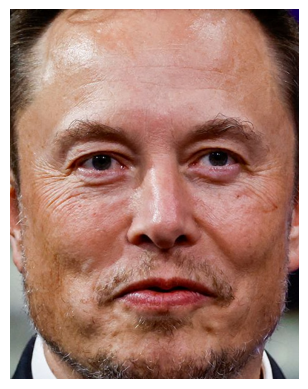

In [35]:
target_img = DeepFace.extract_faces(
    img_path = target_path, 
    detector_backend=detector_backend
)[0]["face"]
plt.imshow(target_img)
plt.axis("off")
plt.show()

In [36]:
target_embedding = DeepFace.represent(
    img_path=target_path,
    model_name=model_name,
    detector_backend=detector_backend
)[0]["embedding"]

1/1 [==============================] - 0s 36ms/step


In [37]:
target_embedding = np.array(target_embedding, dtype = "f")

In [38]:
target_embedding = np.expand_dims(target_embedding, axis = 0)

In [39]:
target_embedding.shape

(1, 512)

In [40]:
k = 1  
tic = time.time()
distances, neighbours = index.search(target_embedding, k)
toc = time.time()
print(f"search completed in {toc - tic} in seconds")

search completed in 0.000997781753540039 in seconds


In [41]:
print(distances)

[[11.65836]]


1/1 [==============================] - 0s 40ms/step


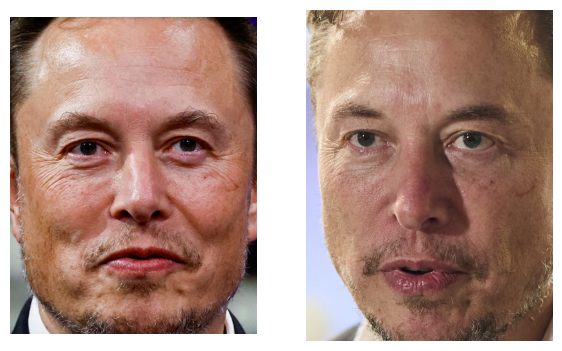

Hallo Elon Musk CEO of SpaceX and Tesla, selamat datang


In [43]:
for idx, neighbour in enumerate(neighbours[0]):
    if neighbour < len(data_nama):
        neighbour_name = data_nama.iloc[neighbour]['name']
        neighbour_pos = data_nama.iloc[neighbour]['posisi']
        neighbour_img_path = f"c:/Users/user/faiss-nyoba/{representation[neighbour][0]}"  
        neighbour_img = DeepFace.extract_faces(
            img_path=neighbour_img_path,
            detector_backend=detector_backend
        )[0]["face"]
        
        # Visualisasi gambar target dan neighbor
        fig = plt.figure(figsize=(7, 7))
        fig.add_subplot(1, 2, 1)
        plt.imshow(target_img)
        plt.axis("off")
        fig.add_subplot(1, 2, 2)
        plt.imshow(neighbour_img)
        plt.axis("off")
        plt.show()
    else:
        print(f"Index {neighbour} out of range for DataFrame")

print(f"Hallo {neighbour_name} {neighbour_pos}, selamat datang")